In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
IMG_SIZE=224
BATCH_SIZE=32

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [7]:
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/Brain_tumor/train',
                                                  target_size=(IMG_SIZE,IMG_SIZE),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='binary',
                                                  subset='training'
                                                  )

Found 915 images belonging to 2 classes.


In [8]:
val_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/Brain_tumor/train',
                                                  target_size=(IMG_SIZE,IMG_SIZE),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='binary',
                                                  subset='validation'
                                                  )

Found 227 images belonging to 2 classes.


In [9]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()
model:"sequential"


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=BATCH_SIZE)

Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 158s 5s/step - accuracy: 0.6580 - loss: 0.6948 - val_accuracy: 0.6696 - val_loss: 0.5792
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - accuracy: 0.7675 - loss: 0.4337 - val_accuracy: 0.7621 - val_loss: 0.4883
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 114s 4s/step - accuracy: 0.8768 - loss: 0.3139 - val_accuracy: 0.8414 - val_loss: 0.3673
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.8919 - loss: 0.2337 - val_accuracy: 0.8678 - val_loss: 0.2976
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 115s 4s/step - accuracy: 0.9521 - loss: 0.1404 - val_accuracy: 0.8855 - val_loss: 0.2631


In [15]:
model.save('/content/drive/MyDrive/Brain_tumor/Demo.h5')

In [3]:
#TEST
#Step1:Load the model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt#visualization
import numpy as np
model=load_model('/content/drive/MyDrive/Brain_tumor/Demo.h5')
print("Model loaded")

Model loaded


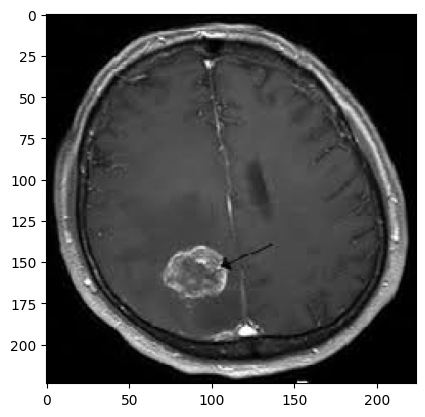

In [4]:
#Step2:Load image
test_image_path="/content/drive/MyDrive/image1.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()



In [5]:
#preprocess the image
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255.

In [6]:
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
[[0.9798855]]


In [9]:
if prediction >= 0.5:
  print("You have brain tumor")
else:
  print("You do not have brain tumor")

You have brain tumor
